In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import FormatStrFormatter

In [ ]:
filename = "mesh_stats.csv"
df = pd.read_csv(filename)
df

,Dataset Class,Dataset,Vertices,Edges,Density,Maximum degree,Minimum degree,Average degree,Average degree variance,Global clustering coefficient,Average clustering coefficient,Dijkstra Avg Time,SLF-LLL Avg Time,Gunrock Avg Time,Speedup SLF-LLL over Dijkstra,Speedup Gunrock over Dijkstra,Speedup Gunrock over SLF-LLL,Average visited Dijkstra,Average visited SLF-LLL,Average visited Gunrock
0,primal,primal_5000,5000,29988,0.001200,7,5,5.99760,0.182794,0.265045,0.267130,1.06791,0.49494,4.761033,2.157655,0.224302,0.103956,3.429744e+04,3.010304e+04,4.556098e+04
1,primal,primal_50000,50000,299988,0.000120,8,5,5.99976,0.180400,0.265016,0.267044,4.98823,2.10006,12.266997,2.375280,0.406638,0.171196,3.411034e+05,3.023924e+05,5.121176e+05
2,primal,primal_250000,250000,1499988,0.000024,8,5,5.99995,0.178720,0.265055,0.267062,28.10629,11.00016,25.902858,2.555080,1.085065,0.424670,1.694302e+06,1.514396e+06,2.807117e+06
3,primal,primal_479970,479970,2879808,0.000013,7,5,5.99997,0.011222,0.283233,0.283527,58.64417,25.11484,34.813407,2.335041,1.684528,0.721413,3.303025e+06,2.908684e+06,7.588213e+06
4,primal,primal_999993,999993,5999994,0.000006,8,5,6.00004,0.179031,0.265056,0.267067,128.83181,57.99657,170.099170,2.221369,0.757392,0.340957,6.779217e+06,6.052489e+06,1.315468e+07
5,extended_k3,extended_k3_5000,5000,182962,0.007320,45,29,36.59240,3.634260,0.293703,0.293667,3.34786,1.56478,2.202997,2.139508,1.519685,0.710296,3.837469e+05,1.894206e+05,4.503235e+05
6,extended_k3,extended_k3_50000,50000,1832482,0.000733,42,30,36.64960,2.387970,0.300297,0.300329,17.04917,7.86727,6.341829,2.167101,2.688368,1.240536,4.028683e+06,2.044442e+06,4.699307e+06
7,extended_k3,extended_k3_250000,250000,9162884,0.000147,43,30,36.65150,2.359540,0.302012,0.302076,85.66620,43.49470,12.800245,1.969578,6.692544,3.397958,2.021936e+07,1.078163e+07,2.244506e+07
8,extended_k3,extended_k3_479970,479970,17305418,0.000075,42,30,36.05520,1.126390,0.261608,0.262060,174.14421,86.77742,19.220843,2.006792,9.060175,4.514756,3.867509e+07,2.017504e+07,4.532871e+07
9,extended_k3,extended_k3_999993,999993,36656728,0.000037,44,30,36.65700,2.385400,0.300400,0.300423,376.53014,186.16201,74.754674,2.022594,5.036878,2.490306,8.011044e+07,4.333284e+07,8.677707e+07


In [ ]:
dataset_classes,counts = np.unique(df["Vertices"],return_counts=True)
dataset_classes = dataset_classes[counts > 1]
speedup_columns = [col for col in df.columns if "Speedup" in col]

# Average execution time for each algorithm as the chosen metric increase

In [ ]:
log_scale = False
log_scale_y = True
x_label = "Average degree"

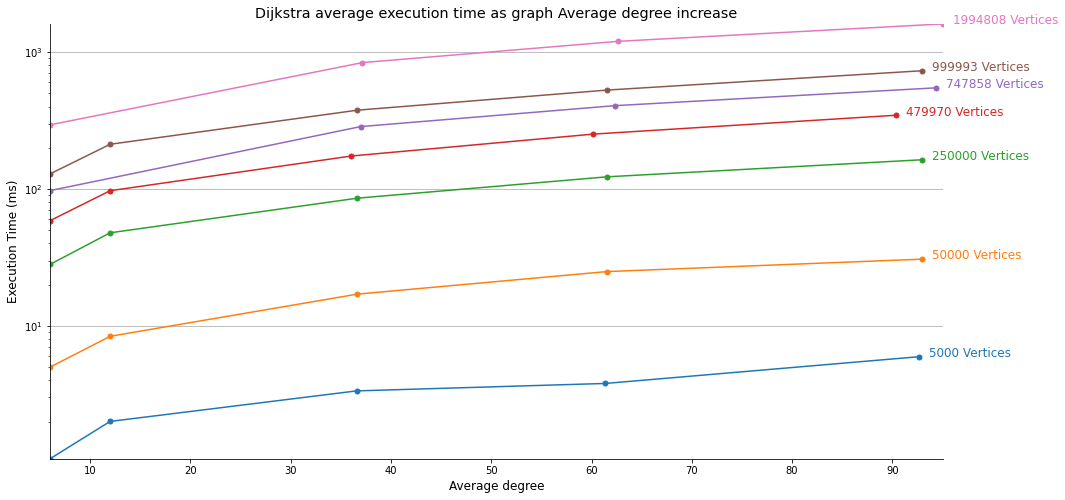

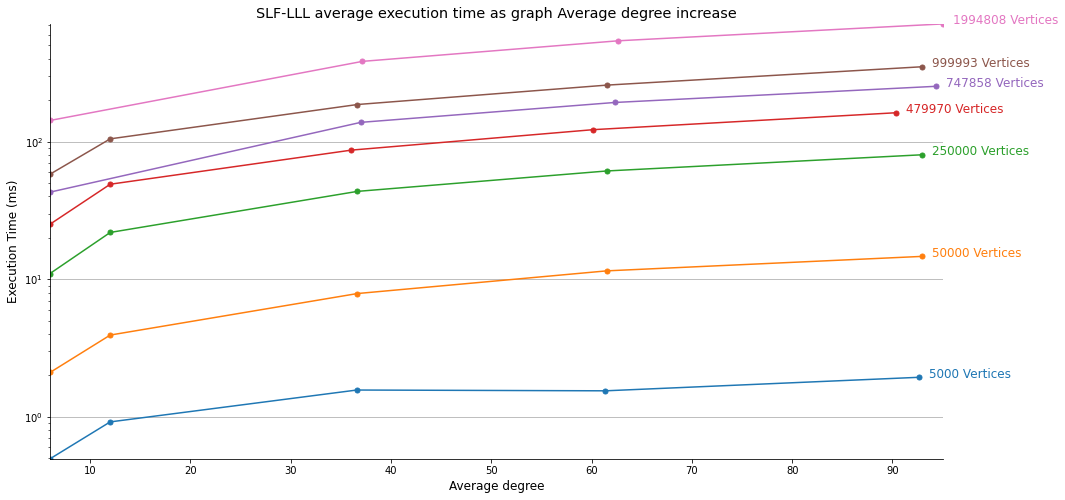

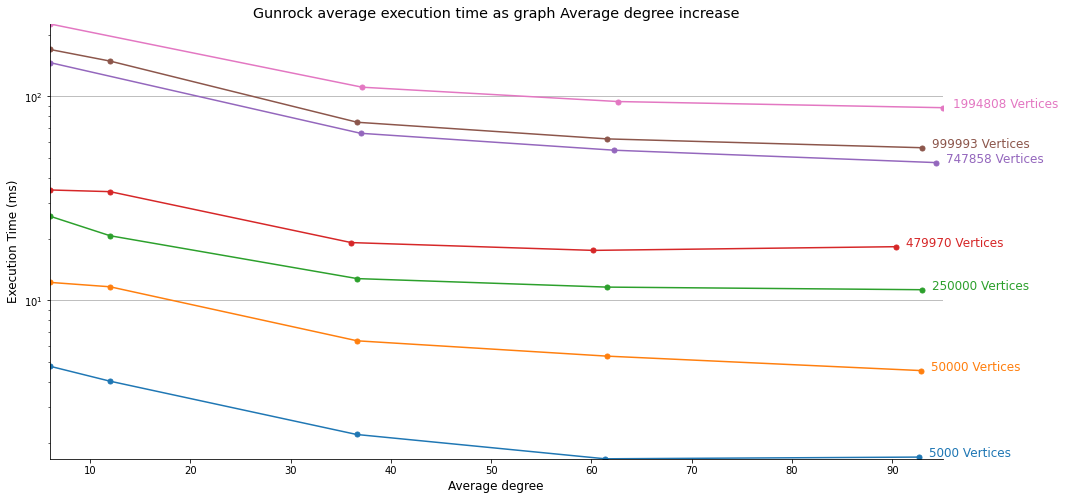

In [ ]:
for alg in ["Dijkstra","SLF-LLL","Gunrock"]:
    plt.figure(figsize=(16,8))
    plt.margins(0)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.title("%s average execution time as graph %s increase"%(alg,x_label),fontsize="x-large")
    plt.xlabel(x_label,fontsize="large")
    plt.ylabel("Execution Time (ms)",fontsize="large")
    if log_scale: plt.gca().set_xscale("log")
    if log_scale_y: plt.gca().set_yscale("log")
    plt.grid(axis="y")
    for dataset_class in dataset_classes:
        y_label = "%s Avg Time"%alg        
        mask = (df['Vertices'] == dataset_class)
        ordered_df = df[mask].sort_values(x_label)
        p = plt.plot(ordered_df[x_label],ordered_df[y_label],label=dataset_class,marker="o",markersize=5)
        index = ordered_df[x_label].argmax()
        x = ordered_df[x_label].iloc[index]
        y = ordered_df[y_label].iloc[index]
        plt.annotate("%s Vertices"%dataset_class,(x,y),textcoords="offset points",xytext=(10,0),ha='left', 
                     color=p[0].get_color(), fontsize="large")
    # plt.ylim(bottom=10**-2,top=10**4)
    plt.show()

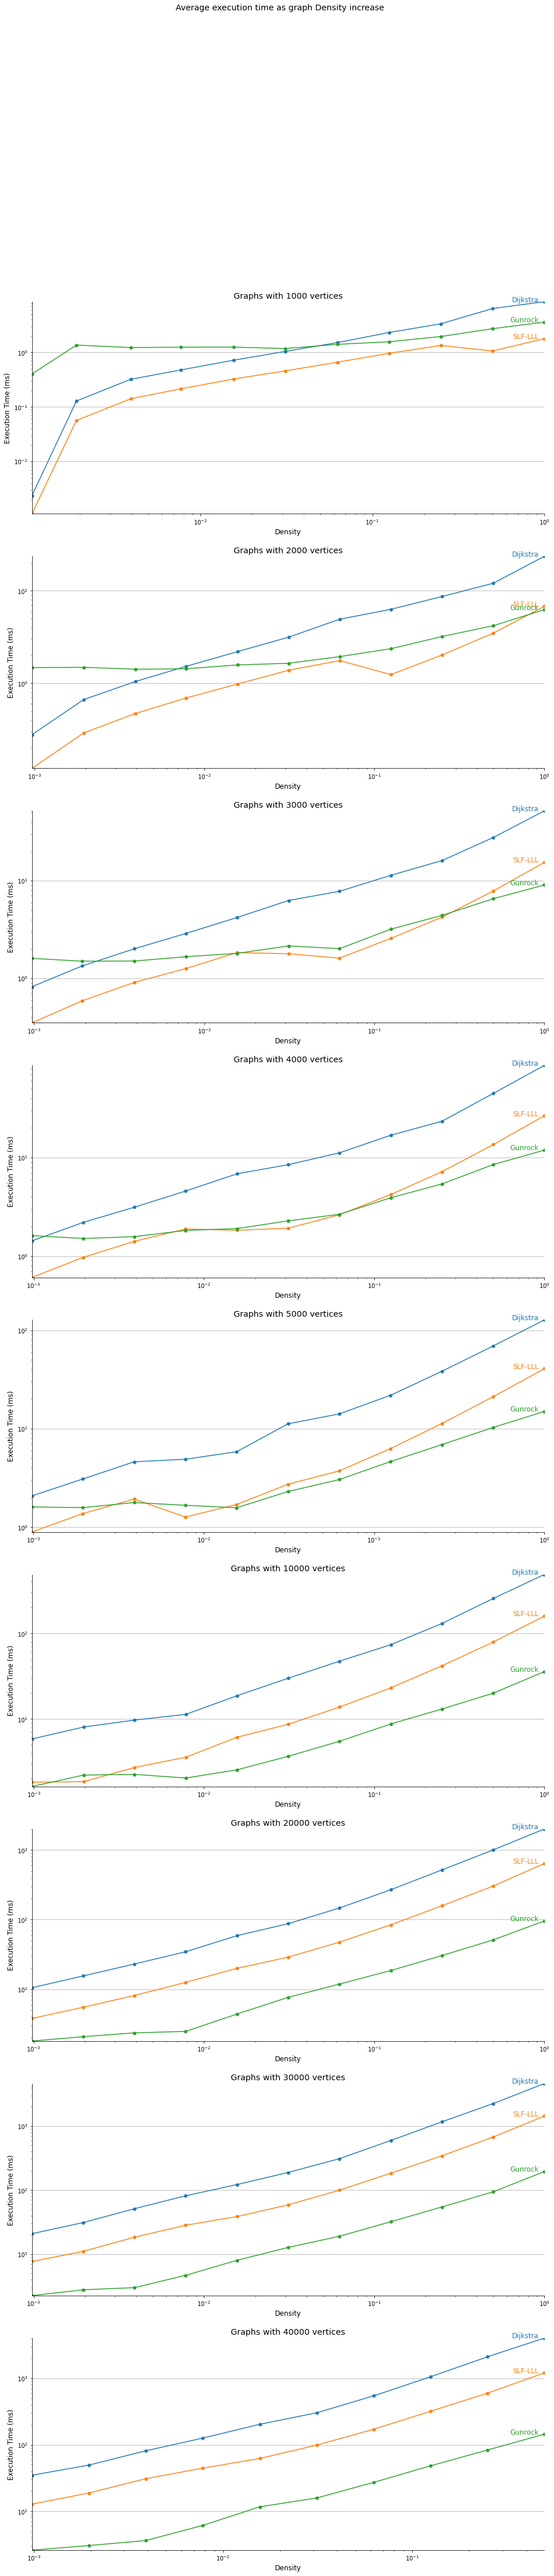

In [ ]:
cols = 1
rows = int(np.ceil(dataset_classes.shape[0]/cols))
i = 1
plt.figure(figsize=(16,8*rows))
for dataset_class in dataset_classes:
    plt.subplot(rows,cols,i)
    mask = (df['Vertices'] == dataset_class)
    ordered_df = df[mask].sort_values(x_label)
    plt.margins(0)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.suptitle("Average execution time as graph %s increase"%(x_label),fontsize="x-large")
    plt.title("Graphs with %d vertices"%dataset_class,fontsize="x-large")
    plt.xlabel(x_label,fontsize="large")
    plt.ylabel("Execution Time (ms)",fontsize="large")
    if log_scale: plt.gca().set_xscale("log")
    if log_scale_y: plt.gca().set_yscale("log")
    plt.grid(axis="y")
    for alg in ["Dijkstra","SLF-LLL","Gunrock"]:
        y_label = "%s Avg Time"%alg      
        p = plt.plot(ordered_df[x_label],ordered_df[y_label],label=alg,marker="o",markersize=5)
        index = ordered_df[x_label].argmax()
        x = ordered_df[x_label].iloc[index]
        y = ordered_df[y_label].iloc[index]
        plt.annotate(alg,(x,y),textcoords="offset points",xytext=(-10,0),ha='right', 
                     color=p[0].get_color(), fontsize="large")
    #plt.ylim(top=np.max(plt.yticks()[0]))
    i += 1
plt.show()

# Speedup of the parallel execution over the other algorithms as the chosen metric increase

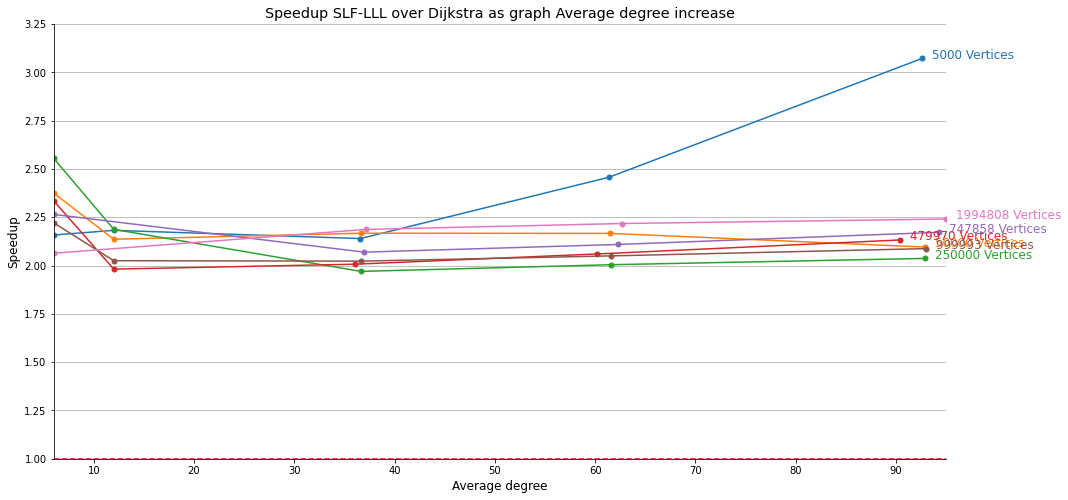

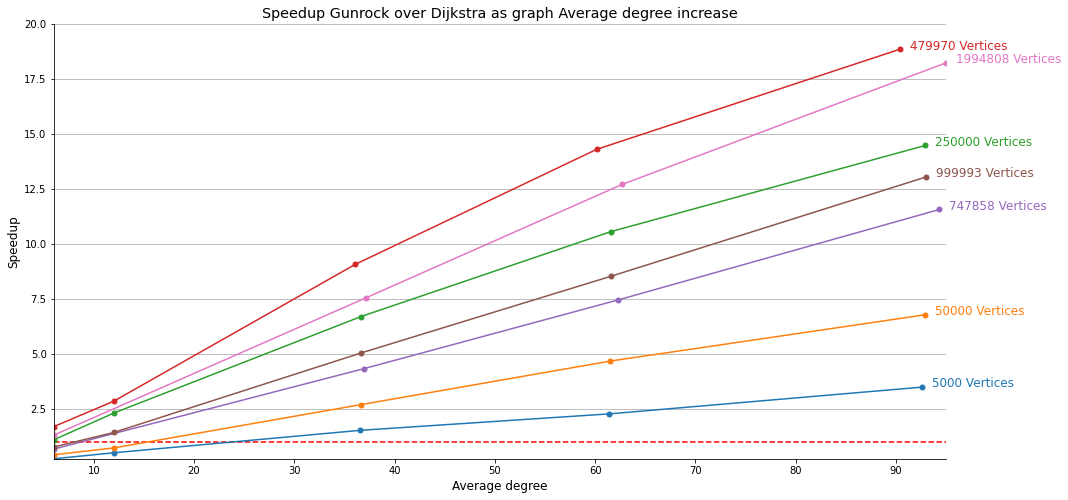

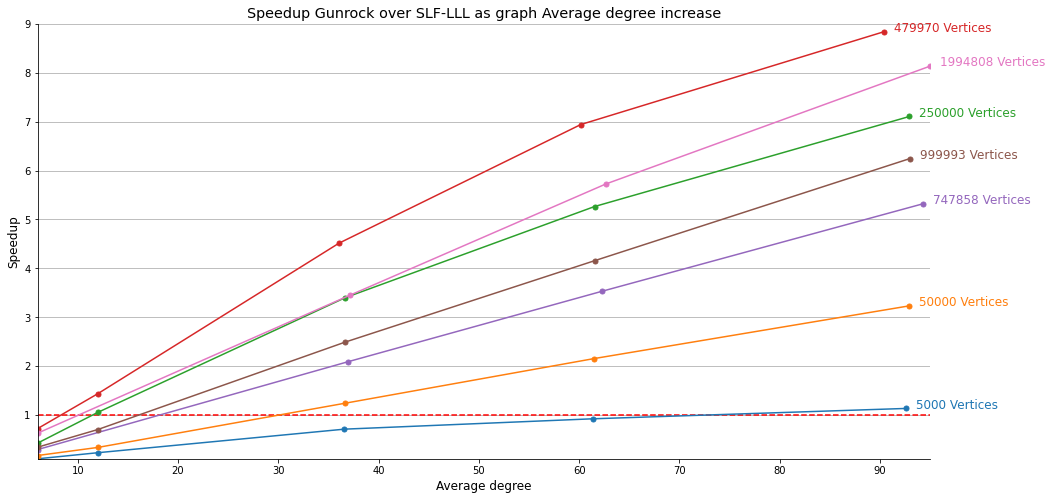

In [ ]:
for y_label in speedup_columns:
    plt.figure(figsize=(16,8))
    plt.margins(0)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.title("%s as graph %s increase"%(y_label,x_label),fontsize="x-large")
    plt.xlabel(x_label,fontsize="large")
    plt.ylabel("Speedup",fontsize="large")
    if log_scale: plt.gca().set_xscale("log")
    plt.axhline(y=1, color='r', linestyle='--')
    plt.grid(axis="y")
    for dataset_class in dataset_classes:
        mask = (df['Vertices'] == dataset_class)
        ordered_df = df[mask].sort_values(x_label)
        p = plt.plot(ordered_df[x_label],ordered_df[y_label],label=dataset_class,marker="o",markersize=5)
        index = ordered_df[x_label].argmax()
        x = ordered_df[x_label].iloc[index]
        y = ordered_df[y_label].iloc[index]
        plt.annotate("%s Vertices"%dataset_class,(x,y),textcoords="offset points",xytext=(10,0),ha='left', 
                     color=p[0].get_color(),fontsize="large")
    plt.ylim(top=np.max(plt.yticks()[0]))
    plt.show()

# Average number of neigh visited for each algorithm as the chosen metric increase

In [ ]:
cols = 1
rows = int(np.ceil(dataset_classes.shape[0]/cols))
i = 1
plt.figure(figsize=(16,8*rows))
plt.suptitle("Average neighbors visited as %s increase"%x_label)
for dataset_class in dataset_classes:
    plt.subplot(rows,cols,i)
    mask = (df['Vertices'] == dataset_class)
    ordered_df = df[mask].sort_values(x_label)
    plt.margins(0)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.title("Graphs with %d vertices"%dataset_class,fontsize="x-large")
    plt.xlabel(x_label,fontsize="large")
    plt.ylabel("Visited neighbors",fontsize="large")
    if log_scale: plt.gca().set_xscale("log")
    if log_scale_y: plt.gca().set_yscale("log")
    plt.grid(axis="y")
    for alg in ["Dijkstra","SLF-LLL","Gunrock"]:
        y_label = "Average visited %s"%alg        
        p = plt.plot(ordered_df[x_label],ordered_df[y_label],label=alg,marker="o",markersize=5)
        index = ordered_df[x_label].argmax()
        x = ordered_df[x_label].iloc[index]
        y = ordered_df[y_label].iloc[index]
        plt.annotate(alg,(x,y),textcoords="offset points",xytext=(-10,0),ha='right', 
                     color=p[0].get_color(), fontsize="large")
    plt.ylim(top=np.max(plt.yticks()[0]))
    i += 1
plt.show()

# Frontiers

In [ ]:
frontier_filename = "mesh_frontiers.csv"
frontier_df = pd.read_csv(frontier_filename)
frontier_df

,Dataset,Frontier Size,Elapsed Time,Iteration
0,primal_5000,5.970000,0.123908,1
1,primal_5000,36.040000,0.093991,2
2,primal_5000,91.140000,0.090671,3
3,primal_5000,148.490000,0.089541,4
4,primal_5000,205.810000,0.088503,5
...,...,...,...,...
8385,primal_1994808_k5,476661.607843,0.246543,230
8386,primal_1994808_k5,447535.764706,0.242973,231
8387,primal_1994808_k5,416948.470588,0.241395,232
8388,primal_1994808_k5,394542.420000,0.239013,233


In [ ]:
def frontier_string(frontier,header,outstring):
    s = header+"\n"
    for i in range(len(frontier)):
        if i > 5 and i < len(frontier) - 2:
            continue
        s += (outstring+"\n")%frontier[i]
        if i == 5 and len(frontier) > 7:
            s+="...\n"
    return s

In [ ]:
def frontier_string_long(frontier,header,outstring,outstring2):
    s = header+"\n"
    for i in range(len(frontier)):
        if i > 5 and i < len(frontier) - 2:
            continue
        s += outstring%frontier[i][0]
        s += outstring2%frontier[i][1]
        s += "\n"
        if i == 5 and len(frontier) > 7:
            s+="...\n"
    return s

In [ ]:
v = 40000

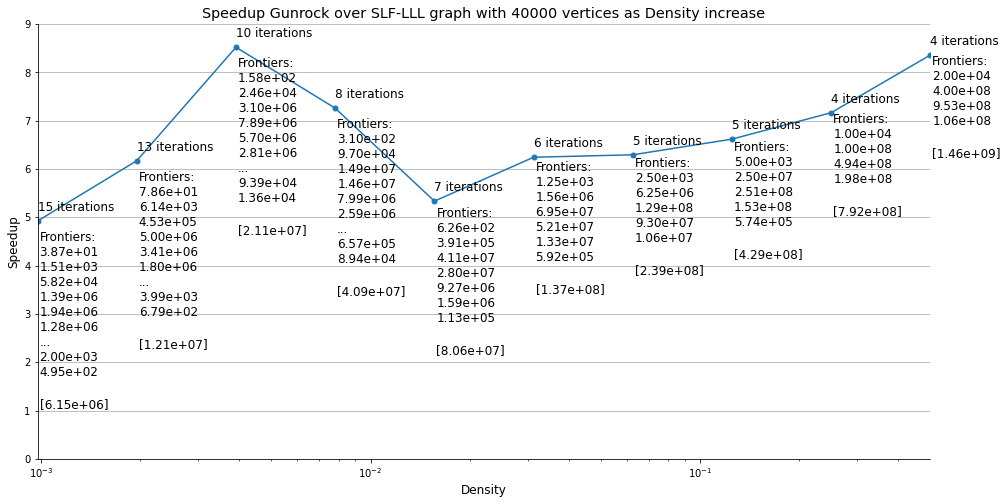

In [ ]:
y_label = "Speedup Gunrock over SLF-LLL"
plt.figure(figsize=(16,8))
plt.margins(0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("%s graph with %d vertices as %s increase"%(y_label,v,x_label),fontsize="x-large")
plt.xlabel(x_label,fontsize="large")
plt.ylabel("Speedup",fontsize="large")
if log_scale: plt.gca().set_xscale("log")
plt.grid(axis="y")
mask = (df['Vertices'] == v)
ordered_df = df[mask].sort_values(x_label)
p = plt.plot(ordered_df[x_label],ordered_df[y_label],label=v,marker="o",markersize=5)
for d in ordered_df['Dataset']:
    x = ordered_df[ordered_df['Dataset'] == d][x_label]
    y = ordered_df[ordered_df['Dataset'] == d][y_label]
    iterations = frontier_df[frontier_df["Dataset"] == d].shape[0]
    avg_visited = ordered_df[ordered_df['Dataset'] == d]["Average visited Gunrock"].to_numpy()
    frontiers = frontier_df[frontier_df["Dataset"] == d]["Frontier Size"].tolist()
    h = iterations
    if h > 7:
        h = 9
    h += 1
    plt.annotate("%d iterations"%iterations,(x,y),textcoords="offset points",xytext=(0,10),ha='left',fontsize="large")
    plt.annotate(frontier_string(frontiers,"Frontiers:","%.2e"),(x,y),textcoords="offset points",xytext=(2,-17*h),ha='left',fontsize="large")
    plt.annotate("[%.2e]"%avg_visited,(x,y),textcoords="offset points",xytext=(2,-17*(h+1)),ha='left',fontsize="large")
plt.ylim(bottom=0,top=np.max(plt.yticks()[0]))
plt.show()

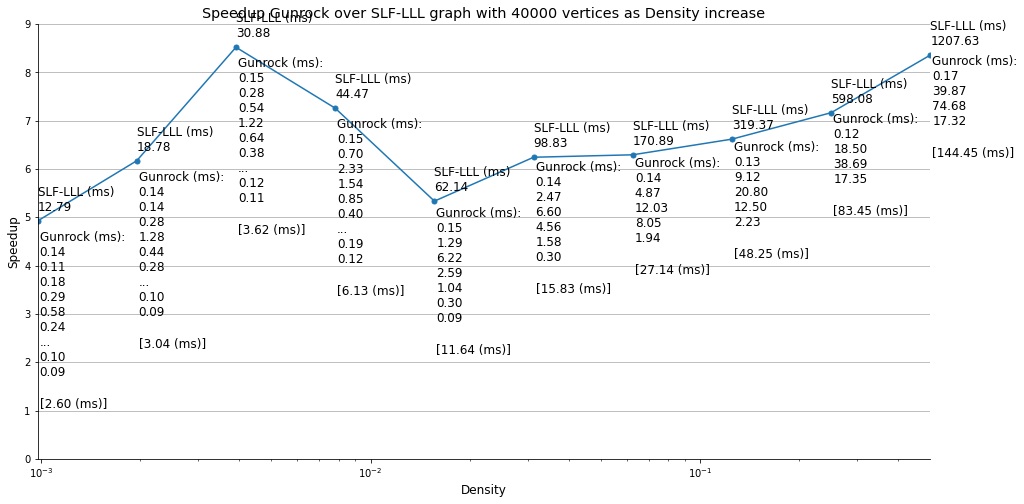

In [ ]:
y_label = "Speedup Gunrock over SLF-LLL"
plt.figure(figsize=(16,8))
plt.margins(0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("%s graph with %d vertices as %s increase"%(y_label,v,x_label),fontsize="x-large")
plt.xlabel(x_label,fontsize="large")
plt.ylabel("Speedup",fontsize="large")
if log_scale: plt.gca().set_xscale("log")
plt.grid(axis="y")
mask = (df['Vertices'] == v)
ordered_df = df[mask].sort_values(x_label)
p = plt.plot(ordered_df[x_label],ordered_df[y_label],label=v,marker="o",markersize=5)
for d in ordered_df['Dataset']:
    x = ordered_df[ordered_df['Dataset'] == d][x_label]
    y = ordered_df[ordered_df['Dataset'] == d][y_label]
    slflll_time = ordered_df[ordered_df['Dataset'] == d]["SLF-LLL Avg Time"].to_numpy()
    gunrock_time = ordered_df[ordered_df['Dataset'] == d]["Gunrock Avg Time"].to_numpy()
    frontier_times = frontier_df[frontier_df["Dataset"] == d]["Elapsed Time"].to_numpy()
    h = frontier_df[frontier_df["Dataset"] == d].shape[0]
    if h > 7:
        h = 9
    h += 1
    plt.annotate("SLF-LLL (ms)\n%.2f"%slflll_time,(x,y),textcoords="offset points",xytext=(0,10),ha='left',fontsize="large")
    plt.annotate(frontier_string(frontier_times,"Gunrock (ms):","%.2f"),(x,y),textcoords="offset points",xytext=(2,-17*h),ha='left',fontsize="large")
    plt.annotate("[%.2f (ms)]"%gunrock_time,(x,y),textcoords="offset points",xytext=(2,-17*(h+1)),ha='left',fontsize="large")
plt.ylim(bottom=0,top=np.max(plt.yticks()[0]))
plt.show()

# Random Frontiers

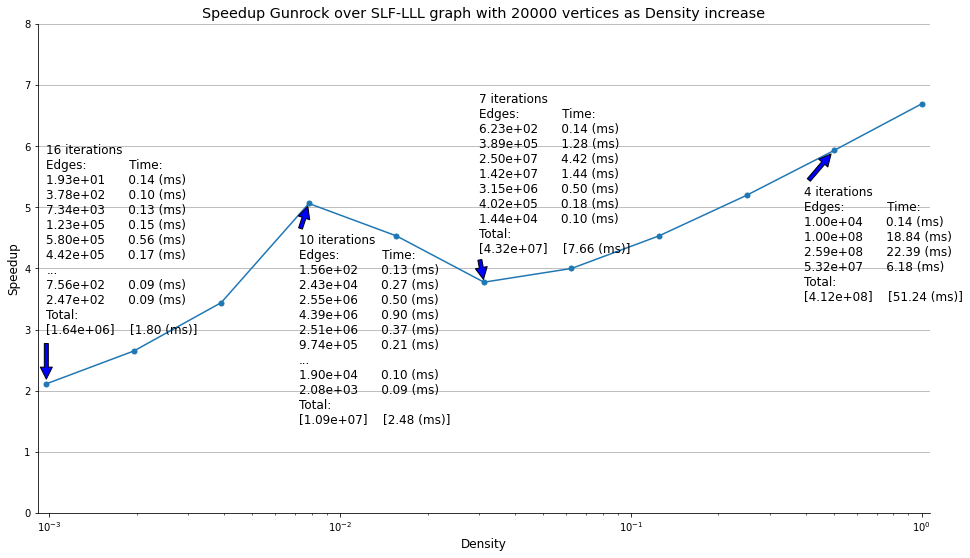

In [ ]:
v = 20000
v_list = ["rand20000_010","rand20000_078","rand20000_3","rand20000_50"]

y_label = "Speedup Gunrock over SLF-LLL"
plt.figure(figsize=(16,9))
plt.margins(0.01)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("%s graph with %d vertices as %s increase"%(y_label,v,x_label),fontsize="x-large")
plt.xlabel(x_label,fontsize="large")
plt.ylabel("Speedup",fontsize="large")
if log_scale: plt.gca().set_xscale("log")
plt.grid(axis="y")
mask = (df['Vertices'] == v)
ordered_df = df[mask].sort_values(x_label)
scatter_df = ordered_df[ordered_df['Dataset'].isin(v_list)]
p = plt.plot(ordered_df[x_label],ordered_df[y_label],label=v,marker="o",markersize=5)
for d in scatter_df['Dataset']:
    x = ordered_df[ordered_df['Dataset'] == d][x_label]
    y = ordered_df[ordered_df['Dataset'] == d][y_label]
    iterations = frontier_df[frontier_df["Dataset"] == d].shape[0]
    gunrock_time = ordered_df[ordered_df['Dataset'] == d]["Gunrock Avg Time"].to_numpy()
    avg_visited = ordered_df[ordered_df['Dataset'] == d]["Average visited Gunrock"].to_numpy()
    frontiers_size = frontier_df[frontier_df["Dataset"] == d]["Frontier Size"].tolist()
    frontiers_time = frontier_df[frontier_df["Dataset"] == d]["Elapsed Time"].tolist()
    frontiers = np.array([frontiers_size,frontiers_time]).T
    output_string = "%d iterations\n"%iterations
    output_string += frontier_string_long(frontiers,"Edges:"+" "*11+"Time:","%.2e","      %.2f (ms)")
    output_string += "Total:\n[%.2e]    [%.2f (ms)]"%(avg_visited,gunrock_time)
    if d == v_list[0]:
        plt.annotate(output_string,(x,y),textcoords="offset points",xytext=(0,50),ha='left',fontsize="large",
                     arrowprops=dict(facecolor='blue', shrink=0.1))
    if d == v_list[1]:
        plt.annotate(output_string,(x,y),textcoords="offset points",xytext=(-10,-220),ha='left',fontsize="large",
                     arrowprops=dict(facecolor='blue', shrink=0.1))
    if d == v_list[2]:
        plt.annotate(output_string,(x,y),textcoords="offset points",xytext=(-5,30),ha='left',fontsize="large",
                     arrowprops=dict(facecolor='blue', shrink=0.1))
    if d == v_list[3]:
        plt.annotate(output_string,(x,y),textcoords="offset points",xytext=(-30,-150),ha='left',fontsize="large",
                     arrowprops=dict(facecolor='blue', shrink=0.1))

plt.ylim(bottom=0,top=8)
plt.show()

In [ ]:
v = 40000
v_list = ["rand40000_010","rand40000_039","rand40000_1","rand40000_50"]

y_label = "Speedup Gunrock over SLF-LLL"
plt.figure(figsize=(16,9))
plt.margins(0.01)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("%s graph with %d vertices as %s increase"%(y_label,v,x_label),fontsize="x-large")
plt.xlabel(x_label,fontsize="large")
plt.ylabel("Speedup",fontsize="large")
if log_scale: plt.gca().set_xscale("log")
plt.grid(axis="y")
mask = (df['Vertices'] == v)
ordered_df = df[mask].sort_values(x_label)
scatter_df = ordered_df[ordered_df['Dataset'].isin(v_list)]
p = plt.plot(ordered_df[x_label],ordered_df[y_label],label=v,marker="o",markersize=5)
for d in scatter_df['Dataset']:
    x = ordered_df[ordered_df['Dataset'] == d][x_label]
    y = ordered_df[ordered_df['Dataset'] == d][y_label]
    iterations = frontier_df[frontier_df["Dataset"] == d].shape[0]
    gunrock_time = ordered_df[ordered_df['Dataset'] == d]["Gunrock Avg Time"].to_numpy()
    avg_visited = ordered_df[ordered_df['Dataset'] == d]["Average visited Gunrock"].to_numpy()
    frontiers_size = frontier_df[frontier_df["Dataset"] == d]["Frontier Size"].tolist()
    frontiers_time = frontier_df[frontier_df["Dataset"] == d]["Elapsed Time"].tolist()
    frontiers = np.array([frontiers_size,frontiers_time]).T
    output_string = "%d iterations\n"%iterations
    output_string += frontier_string_long(frontiers,"Edges:"+" "*11+"Time:","%.2e","      %.2f (ms)")
    output_string += "Total:\n[%.2e]    [%.2f (ms)]"%(avg_visited,gunrock_time)
    if d == v_list[0]:
        plt.annotate(output_string,(x,y),textcoords="offset points",xytext=(0,70),ha='left',fontsize="large",
                     arrowprops=dict(facecolor='blue', shrink=0.1))
    if d == v_list[1]:
        plt.annotate(output_string,(x,y),textcoords="offset points",xytext=(-20,-250),ha='left',fontsize="large",
                     arrowprops=dict(facecolor='blue', shrink=0.1))
    if d == v_list[2]:
        plt.annotate(output_string,(x,y),textcoords="offset points",xytext=(-20,60),ha='left',fontsize="large",
                     arrowprops=dict(facecolor='blue', shrink=0.1))
    if d == v_list[3]:
        plt.annotate(output_string,(x,y),textcoords="offset points",xytext=(-100,-200),ha='left',fontsize="large",
                     arrowprops=dict(facecolor='blue', shrink=0.1))

plt.ylim(bottom=2,top=10)
plt.show()

# Mesh Frontiers

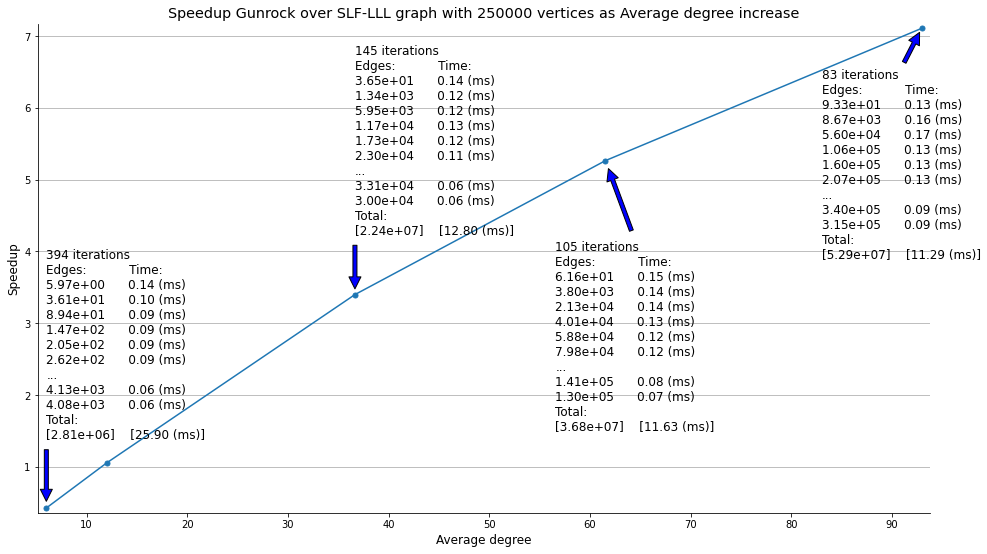

In [ ]:
v = 250000
v_list = ["primal_250000","extended_k3_250000","extended_k4_250000","extended_k5_250000"]

y_label = "Speedup Gunrock over SLF-LLL"
plt.figure(figsize=(16,9))
plt.margins(0.01)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("%s graph with %d vertices as %s increase"%(y_label,v,x_label),fontsize="x-large")
plt.xlabel(x_label,fontsize="large")
plt.ylabel("Speedup",fontsize="large")
if log_scale: plt.gca().set_xscale("log")
plt.grid(axis="y")
mask = (df['Vertices'] == v)
ordered_df = df[mask].sort_values(x_label)
scatter_df = ordered_df[ordered_df['Dataset'].isin(v_list)]
p = plt.plot(ordered_df[x_label],ordered_df[y_label],label=v,marker="o",markersize=5)
for d in scatter_df['Dataset']:
    x = ordered_df[ordered_df['Dataset'] == d][x_label]
    y = ordered_df[ordered_df['Dataset'] == d][y_label]
    iterations = frontier_df[frontier_df["Dataset"] == d].shape[0]
    gunrock_time = ordered_df[ordered_df['Dataset'] == d]["Gunrock Avg Time"].to_numpy()
    avg_visited = ordered_df[ordered_df['Dataset'] == d]["Average visited Gunrock"].to_numpy()
    frontiers_size = frontier_df[frontier_df["Dataset"] == d]["Frontier Size"].tolist()
    frontiers_time = frontier_df[frontier_df["Dataset"] == d]["Elapsed Time"].tolist()
    frontiers = np.array([frontiers_size,frontiers_time]).T
    output_string = "%d iterations\n"%iterations
    output_string += frontier_string_long(frontiers,"Edges:"+" "*11+"Time:","%.2e","      %.2f (ms)")
    output_string += "Total:\n[%.2e]    [%.2f (ms)]"%(avg_visited,gunrock_time)
    if d == v_list[0]:
        plt.annotate(output_string,(x,y),textcoords="offset points",xytext=(0,70),ha='left',fontsize="large",
                     arrowprops=dict(facecolor='blue', shrink=0.1))
    if d == v_list[1]:
        plt.annotate(output_string,(x,y),textcoords="offset points",xytext=(0,60),ha='left',fontsize="large",
                     arrowprops=dict(facecolor='blue', shrink=0.1))
    if d == v_list[2]:
        plt.annotate(output_string,(x,y),textcoords="offset points",xytext=(-50,-270),ha='left',fontsize="large",
                     arrowprops=dict(facecolor='blue', shrink=0.1))
    if d == v_list[3]:
        plt.annotate(output_string,(x,y),textcoords="offset points",xytext=(-100,-230),ha='left',fontsize="large",
                     arrowprops=dict(facecolor='blue', shrink=0.1))
plt.show()

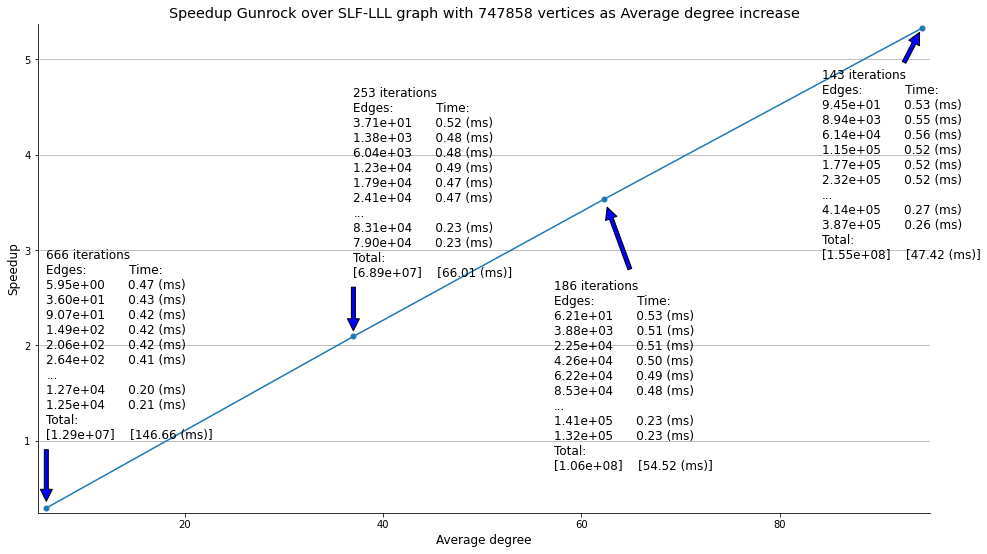

In [ ]:
v = 747858
v_list = ["primal_747858","primal_747858_k3","primal_747858_k4","primal_747858_k5"]

y_label = "Speedup Gunrock over SLF-LLL"
plt.figure(figsize=(16,9))
plt.margins(0.01)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title("%s graph with %d vertices as %s increase"%(y_label,v,x_label),fontsize="x-large")
plt.xlabel(x_label,fontsize="large")
plt.ylabel("Speedup",fontsize="large")
if log_scale: plt.gca().set_xscale("log")
plt.grid(axis="y")
mask = (df['Vertices'] == v)
ordered_df = df[mask].sort_values(x_label)
scatter_df = ordered_df[ordered_df['Dataset'].isin(v_list)]
p = plt.plot(ordered_df[x_label],ordered_df[y_label],label=v,marker="o",markersize=5)
for d in scatter_df['Dataset']:
    x = ordered_df[ordered_df['Dataset'] == d][x_label]
    y = ordered_df[ordered_df['Dataset'] == d][y_label]
    iterations = frontier_df[frontier_df["Dataset"] == d].shape[0]
    gunrock_time = ordered_df[ordered_df['Dataset'] == d]["Gunrock Avg Time"].to_numpy()
    avg_visited = ordered_df[ordered_df['Dataset'] == d]["Average visited Gunrock"].to_numpy()
    frontiers_size = frontier_df[frontier_df["Dataset"] == d]["Frontier Size"].tolist()
    frontiers_time = frontier_df[frontier_df["Dataset"] == d]["Elapsed Time"].tolist()
    frontiers = np.array([frontiers_size,frontiers_time]).T
    output_string = "%d iterations\n"%iterations
    output_string += frontier_string_long(frontiers,"Edges:"+" "*11+"Time:","%.2e","      %.2f (ms)")
    output_string += "Total:\n[%.2e]    [%.2f (ms)]"%(avg_visited,gunrock_time)
    if d == v_list[0]:
        plt.annotate(output_string,(x,y),textcoords="offset points",xytext=(0,70),ha='left',fontsize="large",
                     arrowprops=dict(facecolor='blue', shrink=0.1))
    if d == v_list[1]:
        plt.annotate(output_string,(x,y),textcoords="offset points",xytext=(0,60),ha='left',fontsize="large",
                     arrowprops=dict(facecolor='blue', shrink=0.1))
    if d == v_list[2]:
        plt.annotate(output_string,(x,y),textcoords="offset points",xytext=(-50,-270),ha='left',fontsize="large",
                     arrowprops=dict(facecolor='blue', shrink=0.1))
    if d == v_list[3]:
        plt.annotate(output_string,(x,y),textcoords="offset points",xytext=(-100,-230),ha='left',fontsize="large",
                     arrowprops=dict(facecolor='blue', shrink=0.1))
plt.show()

In [ ]:
log_scale = True

In [ ]:
for y_label in speedup_columns[-2:]:
    plt.figure(figsize=(16,8))
    plt.margins(0)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.title("%s as graph average frontier size increase"%(y_label),fontsize="x-large")
    plt.xlabel("Average frontier size",fontsize="large")
    plt.ylabel("Speedup",fontsize="large")
    if log_scale: plt.gca().set_xscale("log")
    plt.axhline(y=1, color='r', linestyle='--')
    plt.grid(axis="y")
    for dataset_class in dataset_classes[-3:]:
        mask = (df['Vertices'] == dataset_class)
        ordered_df = df[mask]
        frontiers_mean = np.array([np.mean(frontiers_sizes[d]) for d in ordered_df['Dataset']])
        p = plt.plot(frontiers_mean,ordered_df[y_label],label="%d Vertices"%dataset_class,marker="o",markersize=5)
    plt.legend()
    plt.ylim(top=np.max(plt.yticks()[0]))
    plt.show()

# Speedup of the parallel execution over the other algorithms as the variance increase

In [ ]:
variance_df = pd.read_csv("variance_stats.csv")
variance_df

,Dataset Class,Dataset,Vertices,Edges,Density,Maximum degree,Minimum degree,Average degree,Average degree variance,Global clustering coefficient,Average clustering coefficient,Dijkstra Avg Time,SLF-LLL Avg Time,Gunrock Avg Time,Speedup SLF-LLL over Dijkstra,Speedup Gunrock over Dijkstra,Speedup Gunrock over SLF-LLL,Average visited Bellman-Ford,Average visited Dijkstra,Average visited SLF-LLL
0,random92,rand500000_92_15,500000,46264362,0.000185,170,21,92.5287,224.7150,0.000189,0.000191,992.92680,471.71362,16.566752,2.104936,59.934911,28.473512,167579900.0,169523590.0,85910098.0
1,random92,rand250000_92_25,250000,23113498,0.000370,209,0,92.4540,627.9640,0.000396,0.000415,430.65599,210.65667,8.765389,2.044350,49.131417,24.032780,80762576.0,84994581.0,43015596.0
2,random92,rand250000_92_20,250000,23143362,0.000370,195,2,92.5734,399.1770,0.000386,0.000396,422.21771,199.35570,8.862154,2.117911,47.642789,22.495175,80663787.0,84944205.0,42398175.0
3,random92,rand50000_92_5,50000,4625542,0.001850,117,73,92.5108,25.2722,0.001818,0.001819,58.14523,26.46975,2.561708,2.196667,22.697832,10.332850,14627753.0,16905265.0,7870804.7
4,random92,rand250000_92_30,250000,23118846,0.000370,237,0,92.4754,901.4900,0.000413,0.000443,434.17462,210.37204,8.716138,2.063842,49.812727,24.135923,80267560.0,85280659.0,43740532.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,random184,rand50000_184_35,50000,9239566,0.003696,330,35,184.7910,1229.0100,0.003841,0.003913,118.81381,55.05372,3.802672,2.158143,31.244823,14.477641,27161282.0,37765289.0,15013406.0
76,random184,rand500000_184_20,500000,92234032,0.000369,291,88,184.4680,399.3390,0.000371,0.000373,1715.12990,739.26033,28.228787,2.320062,60.758186,26.188172,299710930.0,376176280.0,161007150.0
77,random184,rand50000_184_30,50000,9216680,0.003687,304,69,184.3340,894.3810,0.003784,0.003828,105.20249,44.38403,3.782201,2.370278,27.815153,11.734975,27118640.0,37648779.0,14892327.0
78,random184,rand500000_184_55,500000,92188124,0.000369,467,0,184.3760,3019.1400,0.000407,0.000431,1703.97770,773.46152,28.168698,2.203054,60.491887,27.458192,296607980.0,378096510.0,167223530.0


In [ ]:
rand184 = variance_df[variance_df["Dataset Class"]=="random184"]
rand184[rand184["Vertices"]==50000].sort_values("Average degree variance")[["Dataset","Edges","Density","Average degree","Average degree variance"]]

,Dataset,Edges,Density,Average degree,Average degree variance
79,rand50000_184_0,9200000,0.003680,184.000,0.0000
59,rand50000_184_5,9225436,0.003690,184.509,25.2011
49,rand50000_184_10,9225706,0.003690,184.514,100.6000
40,rand50000_184_15,9225300,0.003690,184.506,225.1240
72,rand50000_184_20,9229578,0.003692,184.592,403.5160
63,rand50000_184_25,9220976,0.003688,184.420,622.8670
77,rand50000_184_30,9216680,0.003687,184.334,894.3810
75,rand50000_184_35,9239566,0.003696,184.791,1229.0100
36,rand50000_184_40,9234960,0.003694,184.699,1591.8300
39,rand50000_184_45,9240824,0.003696,184.816,2025.3200


In [ ]:
dataset_classes,counts = np.unique(variance_df["Vertices"],return_counts=True)
dataset_classes = dataset_classes[counts > 1]

In [ ]:
log_scale = False
x_label = "Average degree variance"

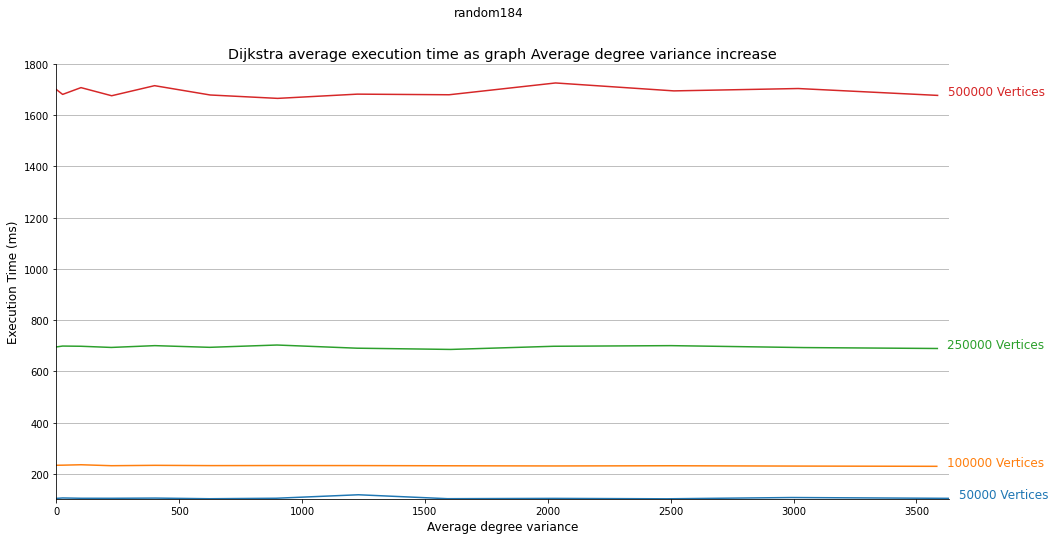

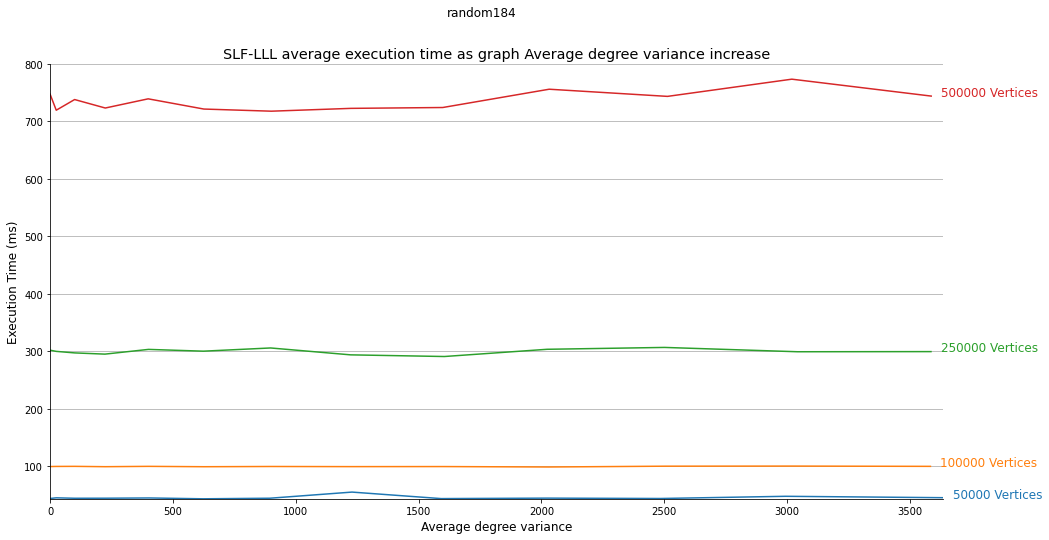

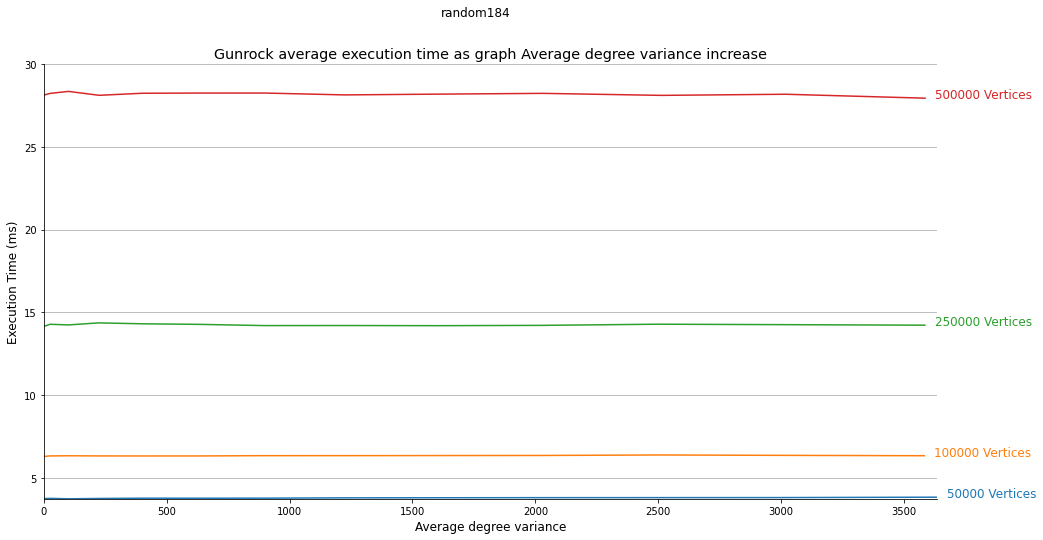

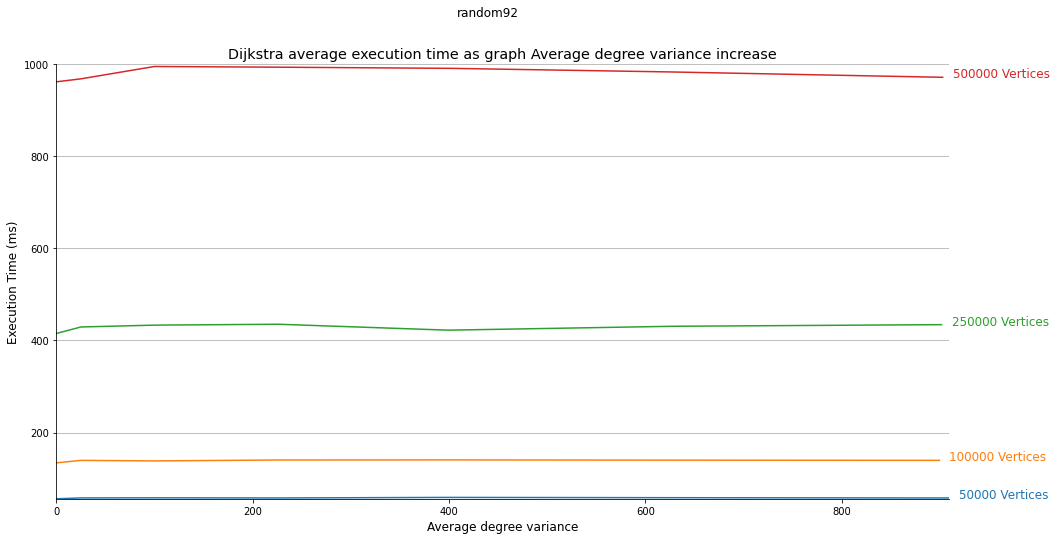

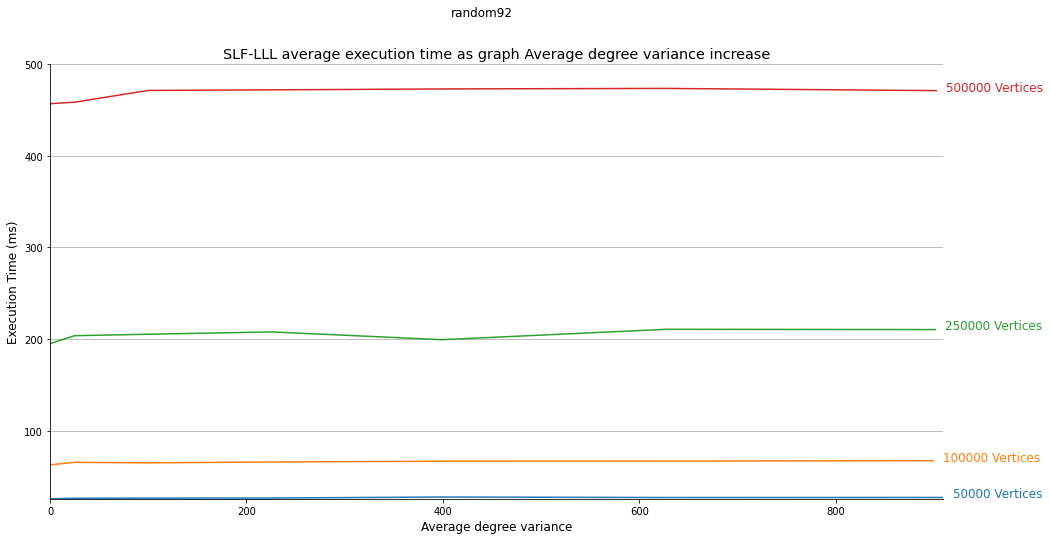

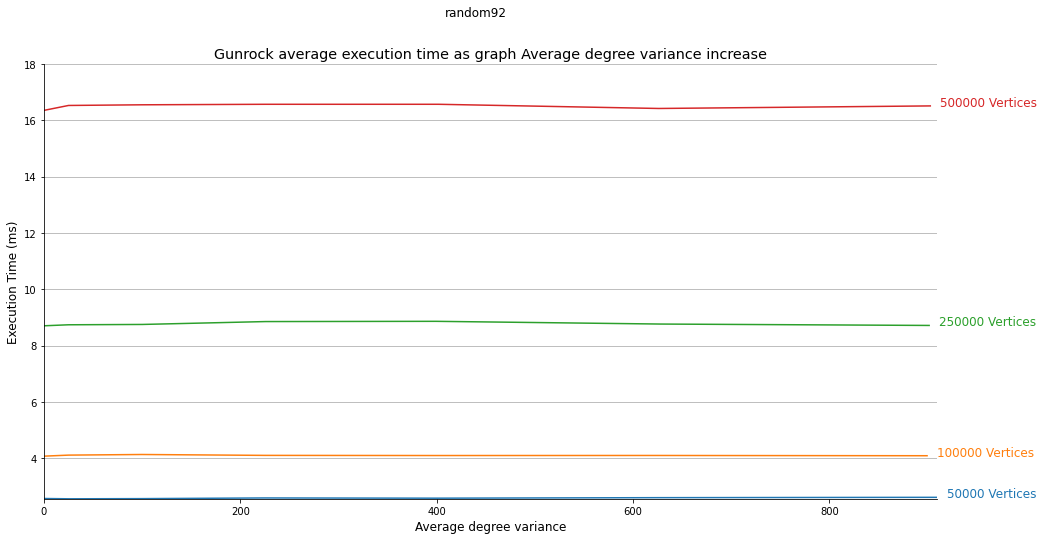

In [ ]:
for cl in np.unique(variance_df["Dataset Class"]):
    filtered_df = variance_df[variance_df["Dataset Class"]== cl]
    for alg in ["Dijkstra","SLF-LLL","Gunrock"]:
        plt.figure(figsize=(16,8))
        plt.margins(0)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.suptitle(cl)
        plt.title("%s average execution time as graph %s increase"%(alg,x_label),fontsize="x-large")
        plt.xlabel(x_label,fontsize="large")
        plt.ylabel("Execution Time (ms)",fontsize="large")
        if log_scale: plt.gca().set_xscale("log")
        plt.grid(axis="y")
        for dataset_class in dataset_classes:
            y_label = "%s Avg Time"%alg        
            mask = (filtered_df['Vertices'] == dataset_class)
            ordered_df = filtered_df[mask].sort_values(x_label)
            p = plt.plot(ordered_df[x_label],ordered_df[y_label],label=dataset_class)
            index = ordered_df[x_label].argmax()
            x = ordered_df[x_label].iloc[index]
            y = ordered_df[y_label].iloc[index]
            plt.annotate("%s Vertices"%dataset_class,(x,y),textcoords="offset points",xytext=(10,0),ha='left', 
                        color=p[0].get_color(), fontsize="large")
        plt.ylim(top=np.max(plt.yticks()[0]))
        plt.show()

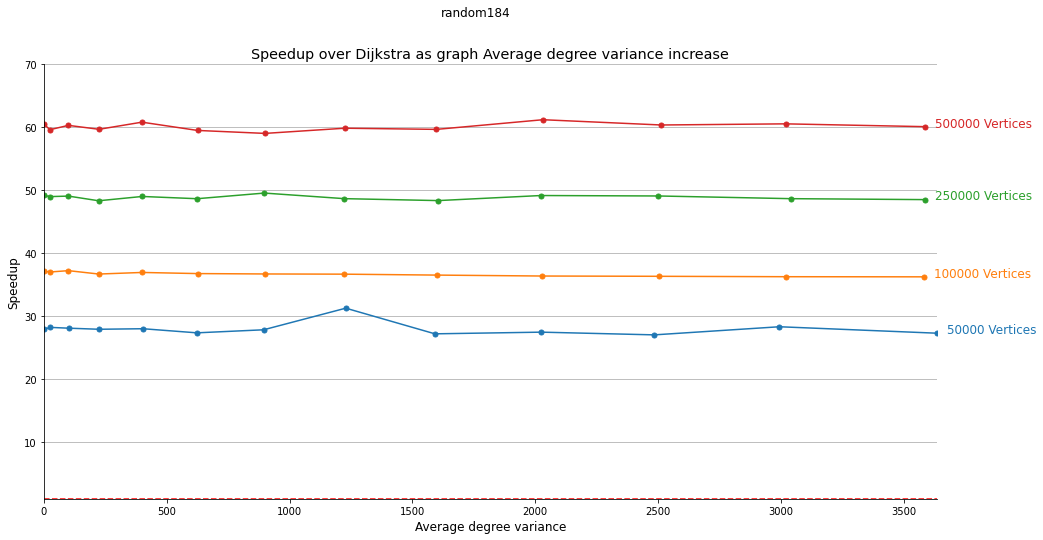

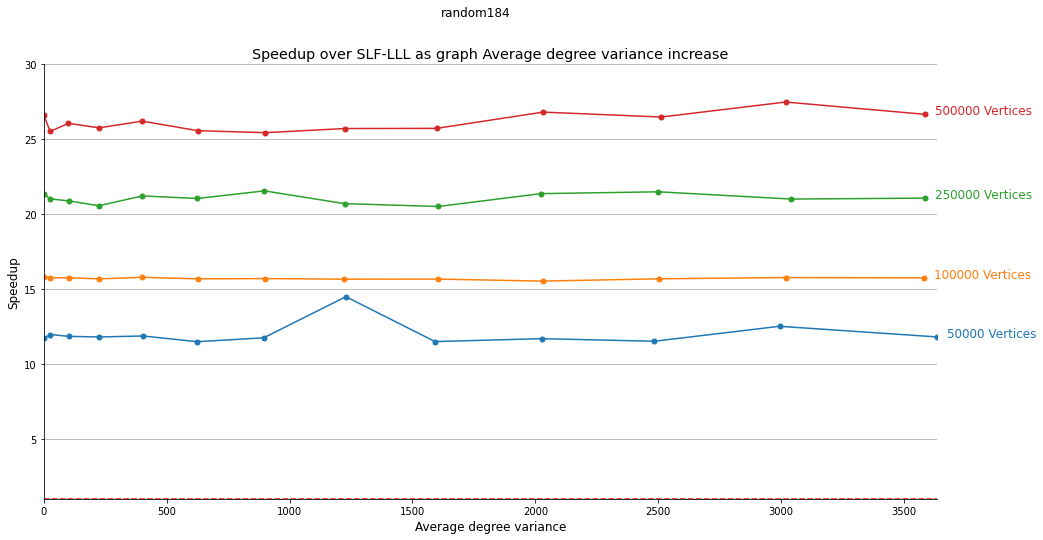

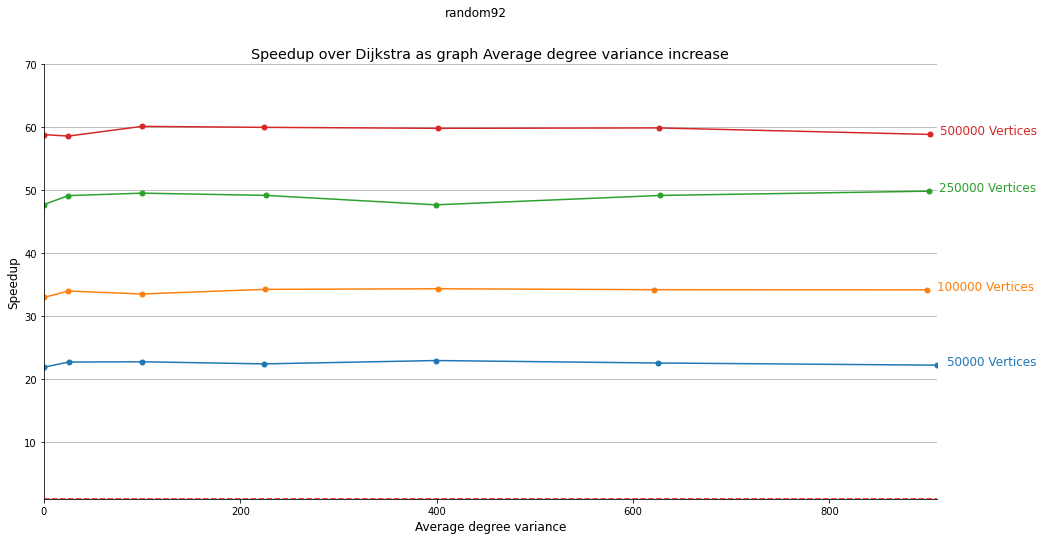

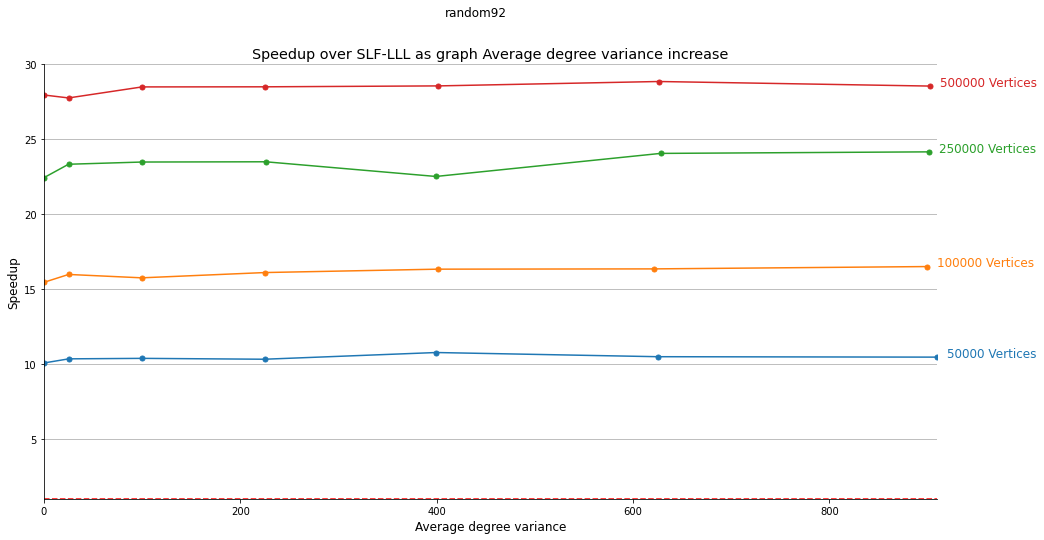

In [ ]:
for cl in np.unique(variance_df["Dataset Class"]):
    filtered_df = variance_df[variance_df["Dataset Class"]== cl]
    dataset_classes = np.unique(filtered_df["Vertices"])
    for alg in ["Dijkstra","SLF-LLL",]:
        plt.figure(figsize=(16,8))
        plt.margins(0)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.suptitle(cl)
        plt.title("Speedup over %s as graph %s increase"%(alg,x_label),fontsize="x-large")
        plt.xlabel(x_label,fontsize="large")
        plt.ylabel("Speedup",fontsize="large")
        if log_scale: plt.gca().set_xscale("log")
        plt.axhline(y=1, color='r', linestyle='--')
        plt.grid(axis="y")
        for dataset_class in dataset_classes:
            y_label = "Speedup Gunrock over %s"%alg        
            mask = (filtered_df['Vertices'] == dataset_class)
            ordered_df = filtered_df[mask].sort_values(x_label)
            p = plt.plot(ordered_df[x_label],ordered_df[y_label],label=dataset_class,marker="o",markersize=5)
            index = ordered_df[x_label].argmax()
            x = ordered_df[x_label].iloc[index]
            y = ordered_df[y_label].iloc[index]
            plt.annotate("%s Vertices"%dataset_class,(x,y),textcoords="offset points",xytext=(10,0),ha='left', 
                        color=p[0].get_color(),fontsize="large")
        plt.ylim(top=np.max(plt.yticks()[0]))
        plt.show()
